# Homework 2

In [6]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from scipy.io.arff import loadarff
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from scipy import stats

### Load input

In [7]:
data = loadarff('../data/pd_speech.arff')
df = pd.DataFrame(data[0])
df['class'] = df['class'].str.decode('utf-8')

X = df.loc[:, df.columns != 'class']
y = df.loc[:, 'class']

### K-fold Stratified Cross Validation

In [8]:
kf = StratifiedKFold(n_splits=10)
kNN = KNeighborsClassifier(weights='uniform', n_neighbors=5, metric='euclidean')
gnb = GaussianNB()

cms_kNN, acc_kNN, cms_gnb, acc_gnb = [], [], [], []
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    y_pred = kNN.fit(X_train, y_train).predict(X_test)
    cms_kNN += [confusion_matrix(y_test, y_pred)]
    acc_kNN += [round(accuracy_score(y_test, y_pred), 2)]

    y_pred = gnb.fit(X_train, y_train).predict(X_test)
    cms_gnb += [confusion_matrix(y_test, y_pred)]
    acc_gnb += [round(accuracy_score(y_test, y_pred), 2)]

### Plot

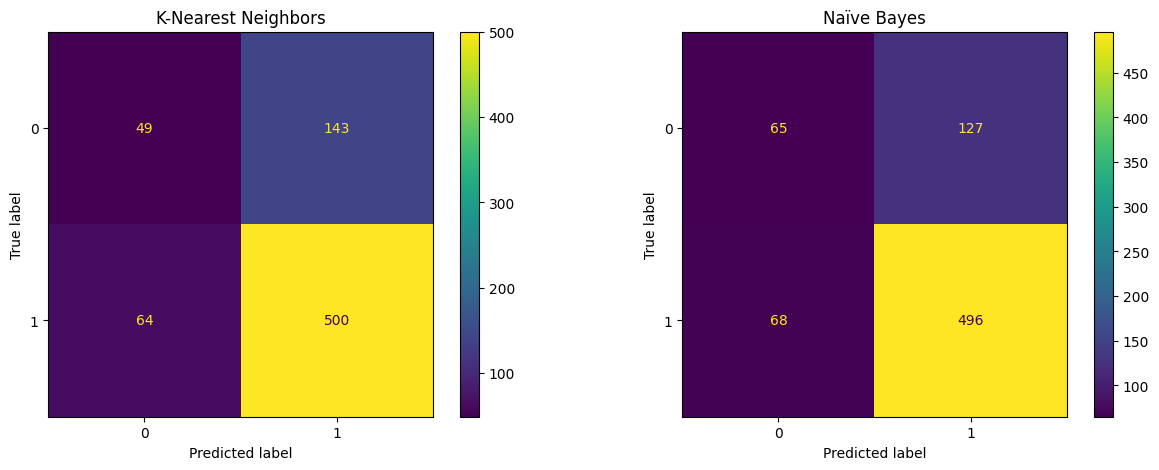

In [9]:
cm_kNN = np.sum(cms_kNN, axis=0)
disp_kNN = ConfusionMatrixDisplay(confusion_matrix=cm_kNN)
cm_gnb = np.sum(cms_gnb, axis=0)
disp_gnb = ConfusionMatrixDisplay(confusion_matrix=cm_gnb)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.title.set_text("K-Nearest Neighbors")
disp_kNN.plot(ax=ax1)
ax2.title.set_text("Naïve Bayes")
disp_gnb.plot(ax=ax2)
plt.show()

### Evaluation

In [10]:
res = stats.ttest_rel(acc_kNN, acc_gnb, alternative='greater')
print("kNN is statistically superior to Naïve Bayes regarding accuracy:", res.pvalue)

kNN is statistically superior to Naïve Bayes regarding accuracy: 0.8026509802312913
